In [65]:
import pandas as pd
import plotly.express as px
import sklearn as sk
import matplotlib as plt

In [66]:
df = pd.read_csv("C:/Users/ahmed/Downloads/Train (6).csv")

In [67]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [68]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [69]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [70]:
if df.Item_Weight.isna().any:
  df.Item_Weight = df.Item_Weight.fillna(df.Item_Weight.mean())
if df.Outlet_Size.isna().any :
  df.Outlet_Size = df.Outlet_Size.fillna(df.Outlet_Size.mode()[0])

In [71]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [72]:
from sklearn.preprocessing import OrdinalEncoder
cat_features = df.select_dtypes(include='object').columns
encoder =sk.preprocessing.OrdinalEncoder()
df[cat_features] =encoder.fit_transform(df[cat_features])

In [73]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [74]:
df.dtypes

Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Item_Outlet_Sales            float64
dtype: object

In [75]:
normalzer = sk.preprocessing.MinMaxScaler()
df = normalzer.fit_transform(df)


In [76]:
df = pd.DataFrame(df)

In [77]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.100128,0.282525,0.25,0.048866,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,0.283587
1,0.005135,0.081274,0.50,0.058705,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,0.031419
2,0.424904,0.770765,0.25,0.051037,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,0.158115
3,0.719512,0.871986,0.50,0.000000,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000,0.053555
4,0.832478,0.260494,0.25,0.000000,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,0.073651


In [78]:
indexes = ['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales'] # Added 'Item_Outlet_Sales' to the list
df.columns = indexes
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.100128,0.282525,0.25,0.048866,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,0.283587
1,0.005135,0.081274,0.50,0.058705,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,0.031419
2,0.424904,0.770765,0.25,0.051037,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,0.158115
3,0.719512,0.871986,0.50,0.000000,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000,0.053555
4,0.832478,0.260494,0.25,0.000000,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,0.073651


In [79]:
X = df.drop('Item_Outlet_Sales',axis=1)
y = df['Item_Outlet_Sales']

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = sk.model_selection.train_test_split(X,y,test_size=0.3,random_state=42)

In [81]:
from sklearn.metrics import mean_squared_error # Corrected the import statement
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [82]:
svr_model = SVR(kernel='rbf') # Changed 'kernal' to 'kernel'
svr_model.fit(X_train,y_train)
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)

In [83]:
mse

0.00751948109851516

In [84]:
from sklearn.tree import DecisionTreeRegressor
tree_reg_model = DecisionTreeRegressor()
tree_reg_model.fit(X_train,y_train)
y_pred = tree_reg_model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)

In [85]:
mse

0.013152508120685004

In [86]:
random = RandomForestRegressor()
random.fit(X_train,y_train)
y_pred = random.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mse

0.007321352381586773

In [87]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
estimators = [
    ('svr', SVR(kernel='rbf')),
    ('tree', DecisionTreeRegressor()),
    ('random_forest', RandomForestRegressor())
]

# Initialize stacking with a meta-learner (e.g., LinearRegression)
stacked_model = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Evaluate
stacked_pred = stacked_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, stacked_pred))
print(f"Stacked RMSE: {rmse}")

Stacked RMSE: 0.08317590652369418


In [88]:
predict_x = stacked_model.predict(X_test.iloc[[15]])
y_orignal = y_test.iloc[[15]]
print(predict_x,y_orignal)

[0.34535578] 6753    0.321432
Name: Item_Outlet_Sales, dtype: float64


In [89]:
# Reshape y_pred to have the same number of columns as the original DataFrame
y_pred_reshaped = np.zeros((y_pred.shape[0], df.shape[1]))
y_pred_reshaped[:, df.columns.get_loc('Item_Outlet_Sales')] = y_pred  # Put y_pred in the correct column

# Now, apply inverse_transform
y_pred_original = normalzer.inverse_transform(y_pred_reshaped)[:, df.columns.get_loc('Item_Outlet_Sales')]
# Extract the 'Item_Outlet_Sales' column

In [90]:
X_test.iloc[[15]]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
6753,0.891528,0.135159,0.25,0.182209,0.533333,0.989109,0.666667,0.791667,1.0,0.5,0.333333


In [91]:
y_test.iloc[[15]]

6753    0.321432
Name: Item_Outlet_Sales, dtype: float64

In [92]:
svr_model.predict(X_test.iloc[[15]])

array([0.29639531])

In [93]:
import joblib
joblib.dump(svr_model, 'svr_model_top4.pkl')

['svr_model_top4.pkl']

                      Feature  Importance
5                    Item_MRP    0.660259
10                Outlet_Type    0.191769
7   Outlet_Establishment_Year    0.113078
9        Outlet_Location_Type    0.099543
6           Outlet_Identifier    0.033165
8                 Outlet_Size    0.032953
4                   Item_Type    0.007425
1                 Item_Weight    0.005918
2            Item_Fat_Content    0.001641
3             Item_Visibility   -0.000633
0             Item_Identifier   -0.005972


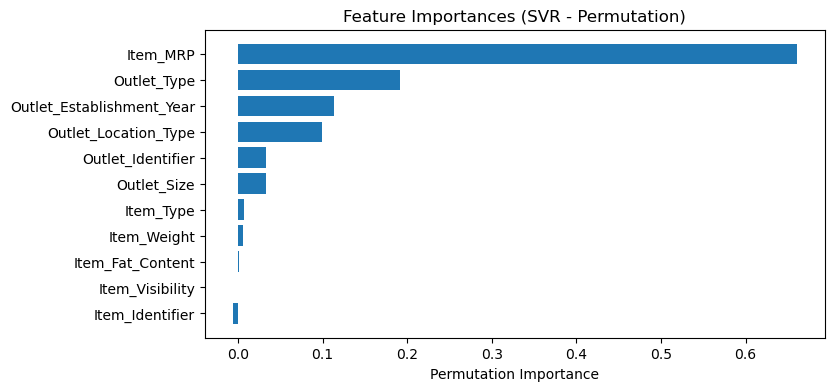